# Notebook description

Illustration of two paths to endemicity: Vital dynamics and waning immunity

In [210]:
# %matplotlib widget

import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

import datetime
             
from scipy.integrate import cumtrapz
# int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
# Hs = np.exp(-u_H*ts) * (r_chr*pars_full['gamma']*int_I + k) 

In [211]:
saveFigures = True
# saveFigures = False

In [212]:
# Reload PandemiXModelFunctions, in case changes have been made
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'd:\\Pandemix\\Github\\modelling\\PandemiXModelFunctions.py'>

In [213]:
# Model with explicit symptomatic category and keeping track of whether recovered were found or not
modelMetaVital = ({
     'beta * S * I' : ['S','I'],
     'nu * I' : ['I','R'],
     'alpha * I': ['I','S'],
     'alpha * R': ['R','S'],
},
['S','I','R'],['beta','nu','alpha'])
modelMetaWaning = ({
     'beta * S * I' : ['S','I'],
     'nu * I' : ['I','R'],
     'rho * R': ['R','S'],
},
['S','I','R'],['beta','nu','rho'])

modelMetaBoth = ({
     'beta * S * I' : ['S','I'],
     'nu * I' : ['I','R'],
     'alpha * I': ['I','S'],
     'alpha * R': ['R','S'],
     'rho * R': ['R','S'],
},
['S','I','R'],['beta','nu','alpha','rho'])


In [214]:
# Initialize everything

DKpop = 5800000
iniInf = 10

I_0 = iniInf/DKpop 
R_0 = 0
S_0 = 1 - I_0 - R_0 

init = {'S' : S_0,'I':I_0,'R':I_0}

R0 = 2
nu = 1/5
beta = R0*nu 
alpha = 1/(80 * 365.25)
rho = 1/(365.25)
parsVital = {'beta':beta,'nu':nu,'alpha':alpha}
parsWaning = {'beta':beta,'nu':nu,'rho':rho}
parsBoth = {'beta':beta,'nu':nu,'alpha':alpha,'rho':rho}

tEnd = np.round(100*365.25)
sch1 = pmf.Scheme(modelMetaVital,init,parsVital,0,tEnd,Changes=[])

# Add a blank change after one year, to force high time resolution initially
curChange = pmf.Change(365)
sch1.addChange(curChange)

sch1.simulate(tRes=1000)
res1 = sch1.result
ts = res1.t 
ty = ts/365.25

In [215]:

# tEnd = 150
# sch2 = pmf.Scheme(modelMetaVital,init,parsVital,0,tEnd,Changes=[])


# sch2.simulate(tRes=1000)
# res2 = sch2.result
# # cumtrapz(beta*res2.S*res2.I,res2.t)
# np.trapz(beta*res2.S*res2.I,res2.t)
# fig,ax = plt.subplots()
# ax.plot(res2.t,DKpop*beta*res2.S*res2.I*0.5)
# ax.set_ylim(bottom=0)
# ax.set_xlim([0,100])

(0.0, 100.0)

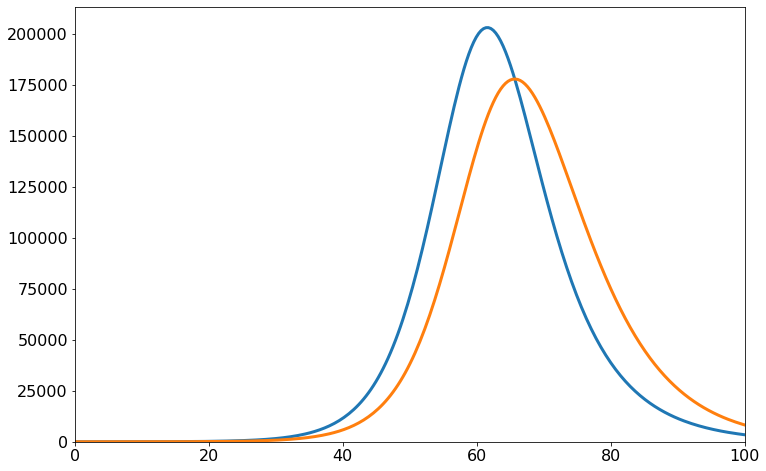

In [216]:
fig,ax = plt.subplots()
ax.plot(ts,DKpop*beta*res1.S*res1.I)
ax.plot(ts,DKpop*nu*res1.I)
# ax.plot(res2.t,DKpop*beta*res2.S*res2.I*0.5)
ax.set_ylim(bottom=0)
ax.set_xlim([0,100])

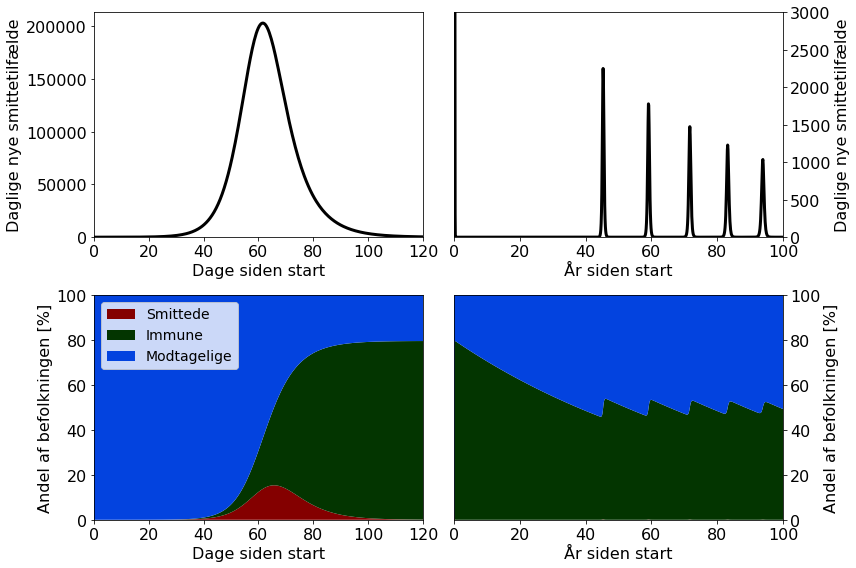

In [217]:
fig,allAxes= plt.subplots(2,2)

(ax,ax3,ax2,ax4) = allAxes.flatten()
ax.plot(ts,DKpop*beta*res1.S*res1.I,'k')
# ax.plot(ts,DKpop*beta*res1.S*res1.I*0.5)
ax2.stackplot(ts,100*res1.I,100*res1.R,100*res1.S,
    labels=['Smittede','Immune','Modtagelige'],
    colors=['xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )

ax.set_ylim(bottom=0)
ax.set_xlim([0,120])
ax2.set_xlim([0,120])

ax2.set_ylim([0,100])
ax2.set_xlabel('Dage siden start')
ax.set_xlabel('Dage siden start')
ax2.set_ylabel('Andel af befolkningen [%]')
ax.set_ylabel('Daglige nye smittetilfælde')


ax3.plot(ty,DKpop*beta*res1.S*res1.I,'k')
# ax.plot(ty,DKpop*beta*res1.S*res1.I*0.5)
ax4.stackplot(ty,100*res1.I,100*res1.R,100*res1.S,
    labels=['Smittede','Immune','Modtagelige'],
    colors=['xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )
    
ax3.set_xlabel('År siden start')
ax4.set_xlabel('År siden start')
ax4.set_ylabel('Andel af befolkningen [%]')
ax3.set_ylabel('Daglige nye smittetilfælde')

ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

ax3.set_ylim(bottom=0)
ax3.set_ylim(top=3000)
# ax.set_ylim([0,0.001*DKpop])
ax3.set_xlim(left=0,right=ty[-1])
ax4.set_xlim(left=0,right=ty[-1])
ax2.legend(loc='upper left',fontsize=14)

ax4.set_ylim([0,100])
fig.tight_layout()

if saveFigures:
    fig.savefig('Figures/Endemic_Vital')

(0.0, 100.0)

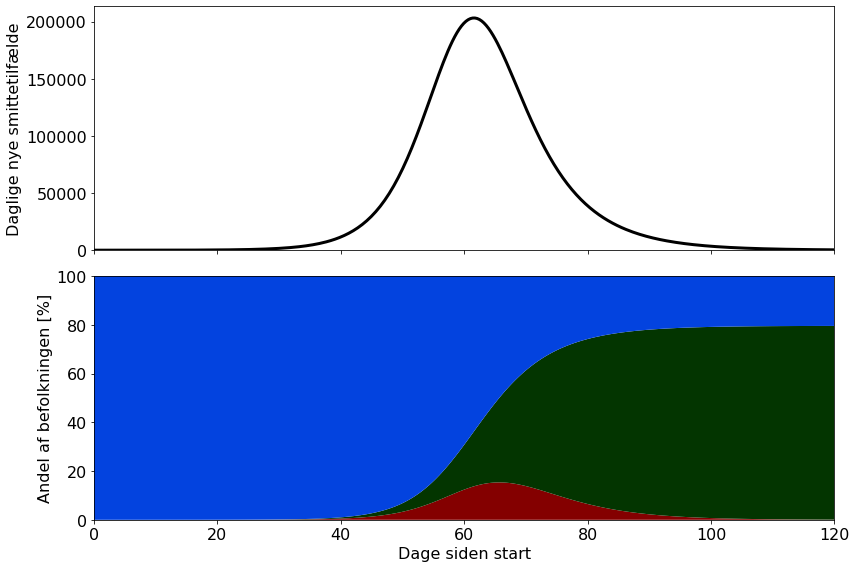

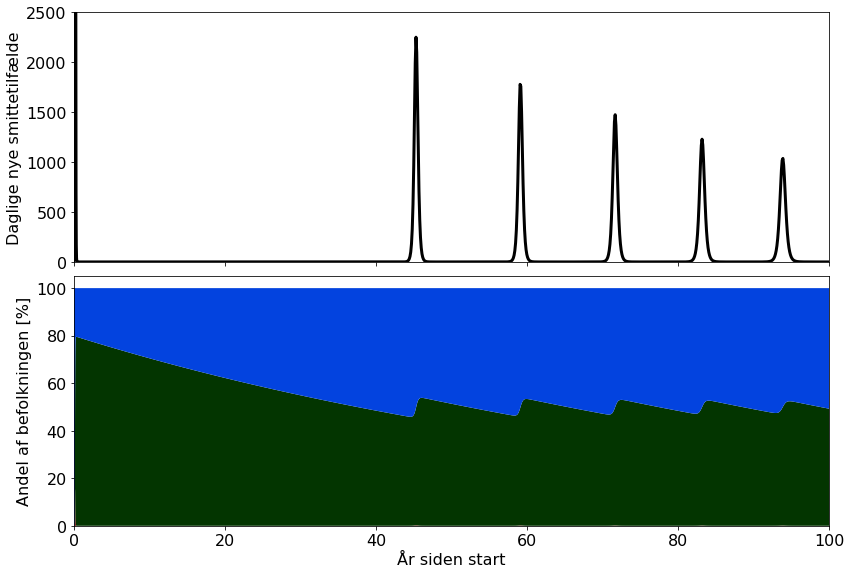

In [218]:
fig,(ax,ax2) = plt.subplots(2,1,sharex=True)
ax.plot(ts,DKpop*beta*res1.S*res1.I,'k')
# ax.plot(ts,DKpop*beta*res1.S*res1.I*0.5)
ax2.stackplot(ts,100*res1.I,100*res1.R,100*res1.S,
    labels=['Smittede','Immune','Modtagelige'],
    colors=['xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )

ax.set_ylim(bottom=0)
ax.set_xlim([0,120])

ax2.set_ylim([0,100])
ax2.set_xlabel('Dage siden start')
ax2.set_ylabel('Andel af befolkningen [%]')
ax.set_ylabel('Daglige nye smittetilfælde')
fig.tight_layout()


fig,(ax,ax2) = plt.subplots(2,1,sharex=True)
ax.plot(ty,DKpop*beta*res1.S*res1.I,'k')
# ax.plot(ty,DKpop*beta*res1.S*res1.I*0.5)
ax2.stackplot(ty,100*res1.I,100*res1.R,100*res1.S,
    labels=['Smittede','Immune','Modtagelige'],
    colors=['xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )
    
ax2.set_xlabel('År siden start')
ax2.set_ylabel('Andel af befolkningen [%]')
ax.set_ylabel('Daglige nye smittetilfælde')
fig.tight_layout()

ax.set_ylim(bottom=0)
ax.set_ylim(top=2500)
# ax.set_ylim([0,0.001*DKpop])
ax.set_xlim(left=0,right=ty[-1])


In [240]:
# Initialize everything

DKpop = 5800000
iniInf = 10

I_0 = iniInf/DKpop 
R_0 = 0
S_0 = 1 - I_0 - R_0 

init = {'S' : S_0,'I':I_0,'R':I_0}

R0 = 2
nu = 1/5
beta = R0*nu 
# alpha = 1/(80 * 365.25)
rho = 1/(2*365.25)
# rho = 1/(5*365.25)
# parsVital = {'beta':beta,'nu':nu,'alpha':alpha}
parsWaning = {'beta':beta,'nu':nu,'rho':rho}
# parsBoth = {'beta':beta,'nu':nu,'alpha':alpha,'rho':rho}

tEnd = np.round(6*365.25)
sch1 = pmf.Scheme(modelMetaWaning,init,parsWaning,0,tEnd,Changes=[])

# Add a blank change after one year, to force high time resolution initially
curChange = pmf.Change(365)
sch1.addChange(curChange)

sch1.simulate(tRes=1000)
res1 = sch1.result
ts = res1.t 
ty = ts/365.25

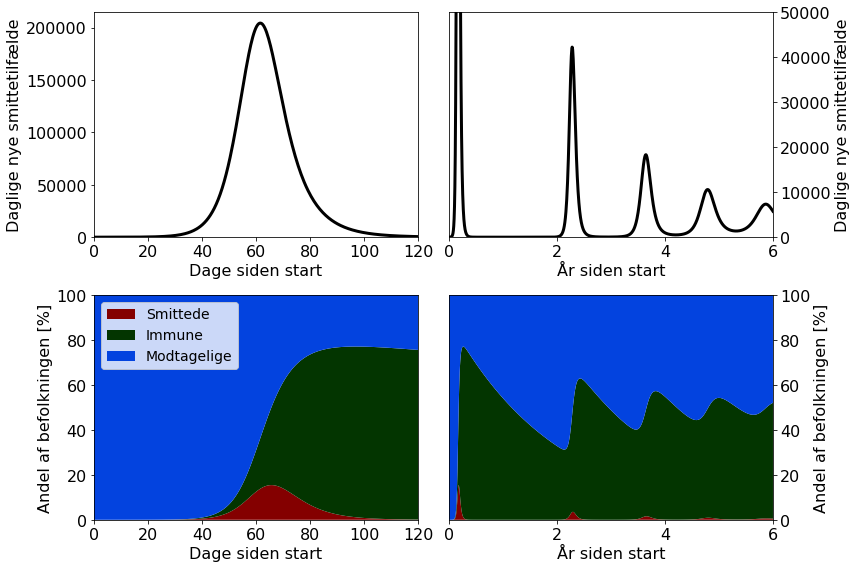

In [241]:
fig,allAxes= plt.subplots(2,2)

(ax,ax3,ax2,ax4) = allAxes.flatten()
ax.plot(ts,DKpop*beta*res1.S*res1.I,'k')
# ax.plot(ts,DKpop*beta*res1.S*res1.I*0.5)
ax2.stackplot(ts,100*res1.I,100*res1.R,100*res1.S,
    labels=['Smittede','Immune','Modtagelige'],
    colors=['xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )

ax.set_ylim(bottom=0)
ax.set_xlim([0,120])
ax2.set_xlim([0,120])

ax2.set_ylim([0,100])
ax2.set_xlabel('Dage siden start')
ax.set_xlabel('Dage siden start')
ax2.set_ylabel('Andel af befolkningen [%]')
ax.set_ylabel('Daglige nye smittetilfælde')


ax3.plot(ty,DKpop*beta*res1.S*res1.I,'k')
# ax.plot(ty,DKpop*beta*res1.S*res1.I*0.5)
ax4.stackplot(ty,100*res1.I,100*res1.R,100*res1.S,
    labels=['Smittede','Immune','Modtagelige'],
    colors=['xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )
    
ax3.set_xlabel('År siden start')
ax4.set_xlabel('År siden start')
ax4.set_ylabel('Andel af befolkningen [%]')
ax3.set_ylabel('Daglige nye smittetilfælde')

ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

ax3.set_ylim(bottom=0)
ax3.set_ylim(top=50000)
# ax.set_ylim([0,0.001*DKpop])
ax3.set_xlim(left=0,right=ty[-1])
ax4.set_xlim(left=0,right=ty[-1])

ax4.set_ylim([0,100])
fig.tight_layout()
ax2.legend(loc='upper left',fontsize=14)

# ax3.set_ylim(top=0.0001)
# ax3.set_yscale('log')
if saveFigures:
    fig.savefig('Figures/Endemic_Waning')

# Waning with multiple stages of exposed

In [221]:
modelMetaWaningExposedMulti = ({
     'beta * S * (I1 + I2)' : ['S','E1'],
     'gamma * E1' : ['E1','E2'],
     'gamma * E2' : ['E2','I1'],
     'nu * I1' : ['I1','I2'],
     'nu * I2' : ['I2','R'],
     'rho * R': ['R','S'],
},
['S','E1','E2','I1','I2','R'],['beta','nu','rho','gamma'])

In [222]:
# Initialize everything

DKpop = 5800000
iniInf = 10

E_0 = iniInf/DKpop 
S_0 = 1 - E_0 

init = {'S' : S_0,'E1':E_0,'E2':0,'I1':0,'I2':0,'R':0}

R0 = 2
gamma = 1/6
nu = 1/6
beta = R0*nu 
rho = 1/(2*365.25)
pars = {'beta':beta,'nu':nu,'rho':rho,'gamma':gamma}

tEnd = np.round(6*365.25)
sch1 = pmf.Scheme(modelMetaWaningExposedMulti,init,pars,0,tEnd,Changes=[])

# Add a blank change after one year, to force high time resolution initially
curChange = pmf.Change(365)
sch1.addChange(curChange)

sch1.simulate(tRes=1000)
res1 = sch1.result
ts = res1.t 
ty = ts/365.25

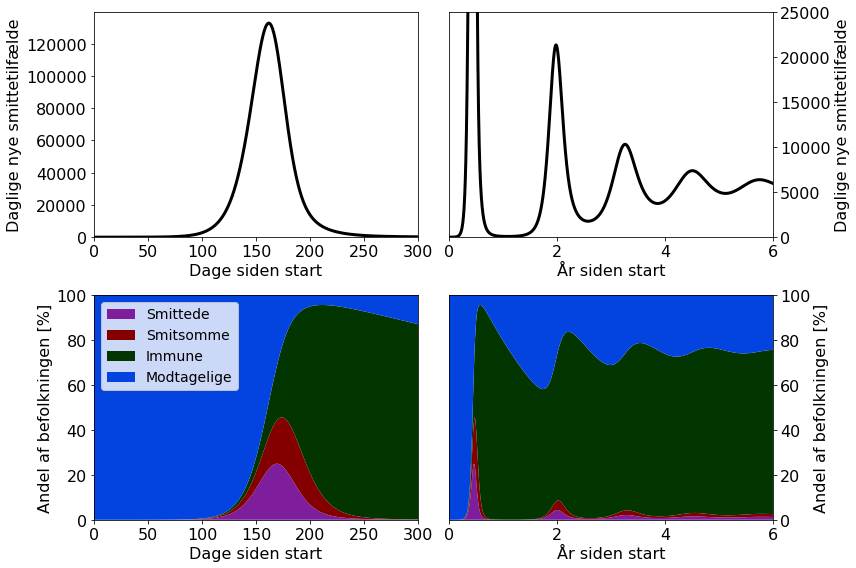

In [227]:
fig,allAxes= plt.subplots(2,2)

(ax,ax3,ax2,ax4) = allAxes.flatten()
ax.plot(ts,DKpop*beta*res1.S*(res1.I1+res1.I2),'k')
# ax.plot(ts,DKpop*beta*res1.S*(res1.I1+res1.I2)*0.5)
ax2.stackplot(ts,100*(res1.E1+res1.E2),100*(res1.I1+res1.I2),100*res1.R,100*res1.S,
    labels=['Smittede','Smitsomme','Immune','Modtagelige'],
    colors=['xkcd:purple','xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )

ax.set_ylim(bottom=0)
ax.set_xlim([0,300])
ax2.set_xlim([0,300])

ax2.set_ylim([0,100])
ax2.set_xlabel('Dage siden start')
ax.set_xlabel('Dage siden start')
ax2.set_ylabel('Andel af befolkningen [%]')
ax.set_ylabel('Daglige nye smittetilfælde')


ax3.plot(ty,DKpop*beta*res1.S*(res1.I1+res1.I2),'k')
# ax.plot(ty,DKpop*beta*res1.S*(res1.I1+res1.I2)*0.5)
ax4.stackplot(ty,100*(res1.E1+res1.E2),100*(res1.I1+res1.I2),100*res1.R,100*res1.S,
    labels=['Smittede','Smitsomme','Immune','Modtagelige'],
    colors=['xkcd:purple','xkcd:dark red','xkcd:dark green','xkcd:blue'],
    )
    
ax3.set_xlabel('År siden start')
ax4.set_xlabel('År siden start')
ax4.set_ylabel('Andel af befolkningen [%]')
ax3.set_ylabel('Daglige nye smittetilfælde')

ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

ax3.set_ylim(bottom=0)
ax3.set_ylim(top=25000)
# ax.set_ylim([0,0.001*DKpop])
ax3.set_xlim(left=0,right=ty[-1])
ax4.set_xlim(left=0,right=ty[-1])

ax2.legend(loc='upper left',fontsize=14)

ax4.set_ylim([0,100])
fig.tight_layout()

if saveFigures:
    fig.savefig('Figures/Endemic_Waning_ExposedStages')

# Exposed vital

In [224]:


modelMetaVitalExposed = ({
     'beta * S * I' : ['S','E'],
     'gamma * E' : ['E','I'],
     'nu * I' : ['I','R'],
     'alpha * I': ['I','S'],
     'alpha * R': ['R','S'],
},
['S','E','I','R'],['beta','gamma','nu','alpha'])


In [225]:
# # Initialize everything

# DKpop = 5800000
# iniInf = 1

# E_0 = iniInf/DKpop
# I_0 = 0 
# R_0 = 0
# S_0 = 1 - E_0 - I_0 - R_0 

# init = {'S' : S_0,'E': E_0, 'I':I_0,'R':I_0}

# R0 = 6
# nu = 1/3
# gamma = 1/3
# beta = R0*nu 
# alpha = 1/(100 * 365.25)
# rho = 1/(365.25)
# parsVitalExposed = {'beta':beta,'nu':nu,'alpha':alpha,'gamma':gamma}
# # parsVital = {'beta':beta,'nu':nu,'alpha':alpha}
# # parsWaning = {'beta':beta,'nu':nu,'rho':rho}
# # parsBoth = {'beta':beta,'nu':nu,'alpha':alpha,'rho':rho}

# tEnd = np.round(50*365.25)
# sch1 = pmf.Scheme(modelMetaVitalExposed,init,parsVitalExposed,0,tEnd,Changes=[])

# # Add a blank change after one year, to force high time resolution initially
# curChange = pmf.Change(365)
# sch1.addChange(curChange)

# sch1.simulate(tRes=1000)
# res1 = sch1.result
# ts = res1.t 
# ty = ts/365.25

# fig,(ax,ax2) = plt.subplots(2,1,sharex=True)
# ax.plot(ts,res1.I)
# # ax2.plot(ts,res1.S)
# # ax2.plot(ts,res1.R)
# ax2.stackplot(ts,res1.S,res1.R,res1.E,res1.I)

# # ax.set_ylim([0,0.01])
# ax.set_ylim(bottom=0)
# ax.set_xlim([0,100])

# fig,(ax,ax2) = plt.subplots(2,1)
# ax.plot(ty,res1.I)
# # ax2.plot(ty,res1.S)
# # ax2.plot(ty,res1.R)
# ax2.stackplot(ty,res1.S,res1.R,res1.E,res1.I)

# ax.set_ylim([0,0.002])
